In [1]:
import glob
import pickle
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [56]:
params_list = []

for fn in glob.glob("random_search/*"):
    with open(fn, "rb") as dumpFile:
        result = pickle.load(dumpFile)
    left = result["results"]["left"]
    right = result["results"]["right"]
    params = result["params"]
    try:
        for i in range(3):
            params["file"] = fn
            params["left_inter_var_{}".format(i)] = np.var(np.abs(left[1:] - left[:-1])[:, i])
            params["right_inter_var_{}".format(i)] = np.var(np.abs(right[1:] - right[:-1])[:, i])
            params["left_right_var_{}".format(i)] = np.var((left - right)[:, i])

        left_origin_x = np.array([np.polyval(left[l, :], 720) for l in range(len(left))])
        params["left_origin_x_dev_sum_sq"] = np.sum(np.abs(left_origin_x - 400)**2)
        right_origin_x = np.array([np.polyval(right[l, :], 720) for l in range(len(right))])
        params["right_origin_x_dev_sum_sq"] = np.sum(np.abs(right_origin_x - 950)**2)

        params_list.append(params)
    except:
        pass
    
df = pd.DataFrame(params_list)
cols = ["left_origin_x_dev_sum_sq", "right_origin_x_dev_sum_sq"]
for col in cols:
    print(col, df[col].min(), df[col].max())
print()

for col in cols:
    print(col, df[col].min(), df[col].max())
    df = df.sort_values(col)[:len(df)//2]
print()
    
for col in cols:
    print(col, df[col].min(), df[col].max())

df = df.sort_values("left_origin_x_dev_sum_sq")
df

left_origin_x_dev_sum_sq 814794.103543 3491804575.52
right_origin_x_dev_sum_sq 439813.239992 35734523.0734

left_origin_x_dev_sum_sq 814794.103543 3491804575.52
right_origin_x_dev_sum_sq 447325.367587 35734523.0734

left_origin_x_dev_sum_sq 839262.59963 12267977.1022
right_origin_x_dev_sum_sq 447325.367587 601895.204872


,closing_window,file,left_inter_var_0,left_inter_var_1,left_inter_var_2,left_origin_x_dev_sum_sq,left_right_var_0,left_right_var_1,left_right_var_2,opening_window,right_inter_var_0,right_inter_var_1,right_inter_var_2,right_origin_x_dev_sum_sq,x_thresh_max,x_thresh_min,y_thresh_max,y_thresh_min
577,2,random_search/9971d2fd-3c31-4802-b796-f5c7b0ce...,1.523311e-07,0.260838,2.799114e+04,8.392626e+05,1.804639e-07,0.315862,3.951602e+04,3,6.931126e-09,0.004593,4.836484e+02,539572.907403,49,17,38,4
86,33,random_search/ad821f59-7bec-4b9a-bc4a-4d034fd6...,9.220779e-08,0.153646,1.620883e+04,8.426493e+05,2.375170e-05,45.821799,5.505994e+06,3,4.062977e-05,78.309808,9.402499e+06,570047.463810,55,16,46,5
137,3,random_search/81f8e7ff-3cb2-499c-9414-d0854e82...,7.521830e-08,0.117170,1.133838e+04,8.463786e+05,1.002275e-07,0.161240,2.096318e+04,2,5.235580e-09,0.005722,4.277505e+02,531728.884165,32,15,18,6
254,29,random_search/36e02d97-3b17-4bc3-91a9-10d716d3...,1.449312e-07,0.235798,2.430390e+04,8.525321e+05,1.668879e-07,0.270409,3.177862e+04,3,2.536808e-09,0.002409,1.938456e+02,463652.119244,59,16,37,6
485,2,random_search/2235f2ea-77d7-42bb-a3ca-f2597d53...,8.163416e-08,0.124677,1.183858e+04,8.538241e+05,1.328972e-07,0.204279,2.381881e+04,3,6.562112e-08,0.092713,6.498953e+03,584346.446857,45,8,23,6
576,14,random_search/439441d6-14ab-4a83-83d4-505813d3...,1.041814e-07,0.174922,1.836389e+04,8.562475e+05,2.089269e-05,40.089241,4.787650e+06,3,2.853904e-05,55.252715,6.651169e+06,572786.774320,53,14,49,6
11,3,random_search/075ae54e-940d-421a-8ebb-85790ccc...,4.902748e-07,0.824496,8.627070e+04,8.648605e+05,5.468327e-07,0.920442,1.007393e+05,2,1.273696e-07,0.204769,2.076151e+04,512583.380272,29,18,55,12
290,11,random_search/853d10c6-ce68-40b1-b75b-0c0135cd...,1.790395e-06,3.161393,3.472038e+05,8.825566e+05,1.916924e-05,37.365015,4.539593e+06,1,3.656250e-05,71.624648,8.725428e+06,497713.791139,17,14,26,17
338,3,random_search/a5b9cc86-3f7b-43cc-9d20-8af5f2d0...,8.537823e-08,0.131677,1.376618e+04,8.904753e+05,1.180819e-07,0.187083,2.261619e+04,1,2.357504e-09,0.001831,1.502532e+02,476874.755013,49,17,55,10
439,5,random_search/7499f712-8b06-4fd1-b78d-684ab4da...,7.781709e-08,0.112762,1.098323e+04,8.942692e+05,1.199523e-07,0.177853,2.161167e+04,3,8.920327e-09,0.011873,1.098214e+03,530079.884221,27,7,47,5


random_search/9971d2fd-3c31-4802-b796-f5c7b0ce0537


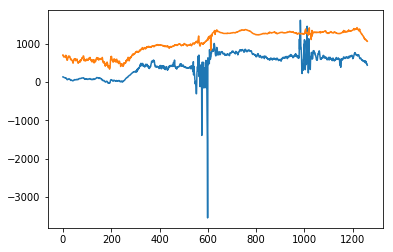

In [57]:
fn = df.iloc[0]["file"]
print(fn)
with open(fn, "rb") as dumpFile:
    result = pickle.load(dumpFile)
left = result["results"]["left"]
right = result["results"]["right"]

plt.plot(left[:, 2])
plt.plot(right[:, 2])